In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("trn.csv")
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


In [2]:
df.isnull().sum() # Checking if there is any null value in the dataset 

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
Accident_ID                0
dtype: int64

In [3]:
#Creating a Label Encoder
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 

In [4]:
# Performing Label Encoding on the necessary features
df['Severity']= le.fit_transform(df['Severity'])

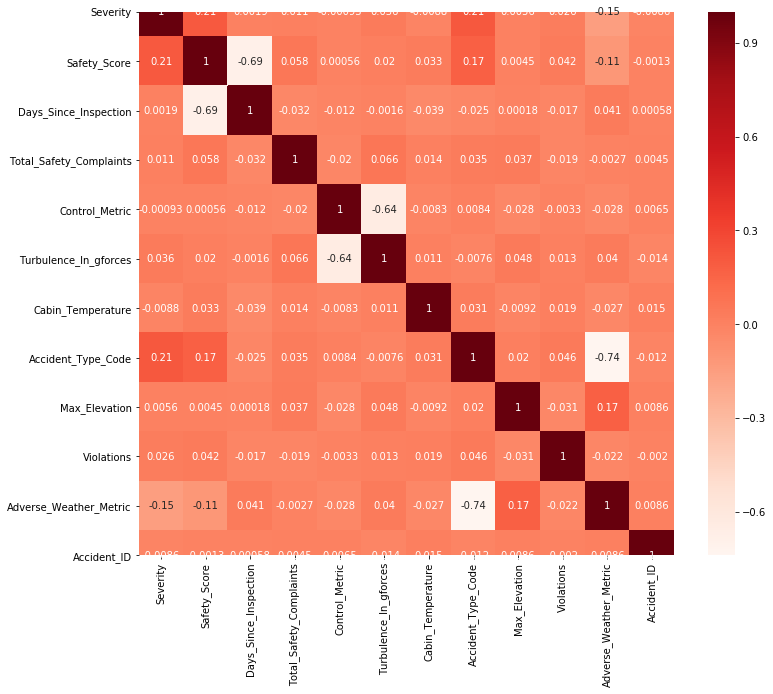

In [8]:
#Creating Pearson Correlation matrix 
import matplotlib.pyplot as plt #Importing matplotlib library
import seaborn as sns#importing seaborn
import statsmodels.api as sm
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

In [9]:
#Correlation with output variable
cor_tar = abs(cor["Severity"])
#Selecting highly correlated features
rel_features = cor_tar[cor_tar>0]
rel_features #we will just take these rel_features in our training set

Severity                   1.000000
Safety_Score               0.205276
Days_Since_Inspection      0.001858
Total_Safety_Complaints    0.010642
Control_Metric             0.000930
Turbulence_In_gforces      0.035977
Cabin_Temperature          0.008819
Accident_Type_Code         0.212203
Max_Elevation              0.005572
Violations                 0.026349
Adverse_Weather_Metric     0.153946
Accident_ID                0.008583
Name: Severity, dtype: float64

In [11]:
df2=df.drop(["Severity","Adverse_Weather_Metric","Accident_ID"],axis=1)
df2.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations
0,0.492237,14,22,71.285324,0.272118,78.04,0.166667,0.480632,3
1,0.624658,10,27,72.288058,0.423939,84.54,0.166667,0.396953,2
2,0.630594,13,16,66.362808,0.322604,78.86,1.000000,0.605637,3
3,0.480822,11,9,74.703737,0.337029,81.79,0.333333,0.660824,1
4,0.264840,13,25,47.948952,0.541140,77.16,0.333333,0.546396,2


In [12]:
x=df2[:]
y=df["Severity"]

In [13]:
df1=pd.read_csv("tst.csv")
df1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,19.497717,16,6,72.151322,0.388959,78.32,4,37949.72439,2,0.069692,1
1,58.173516,15,3,64.585232,0.250841,78.60,7,30194.80557,2,0.002777,10
2,33.287671,15,3,64.721969,0.336669,86.96,6,17572.92548,1,0.004316,14
3,3.287671,21,5,66.362808,0.421775,80.86,3,40209.18634,2,0.199990,17
4,10.867580,18,2,56.107566,0.313228,79.22,2,35495.52541,2,0.483696,21


In [15]:
df1.head()

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,0.194977,16,6,72.151322,0.388959,78.32,0.500000,0.603705,2,0.069692,1
1,0.581735,15,3,64.585232,0.250841,78.60,1.000000,0.477575,2,0.002777,10
2,0.332877,15,3,64.721969,0.336669,86.96,0.833333,0.272287,1,0.004316,14
3,0.032877,21,5,66.362808,0.421775,80.86,0.333333,0.640454,2,0.199990,17
4,0.108676,18,2,56.107566,0.313228,79.22,0.166667,0.563789,2,0.483696,21


In [17]:
df3=df1.drop(["Accident_ID","Adverse_Weather_Metric"],axis=1)

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [145]:
#from sklearn.ensemble import RandomForestClassifier
#model=RandomForestClassifier(n_estimators= 90,random_state =5)
model = xgb.XGBClassifier(
 learning_rate =0.08,
 base_score= 100,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.7,
 colsample_bytree=0.5,
 objective= 'binary:logistic',
 nthread=100,
 scale_pos_weight=1,
 seed=27)

model.fit(x,y)

XGBClassifier(base_score=100, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.08, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=100, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.7, verbosity=1)

In [146]:
y_test1=model.predict(df3)

In [147]:
submission_5 = pd.DataFrame({'Accident_ID':df1['Accident_ID'],'Severity':y_test1})
#submission_5.head()

In [148]:
df['Severity']

0       1
1       1
2       2
3       3
4       2
       ..
9995    3
9996    0
9997    3
9998    1
9999    0
Name: Severity, Length: 10000, dtype: int32

In [149]:
from tqdm import tqdm
for i in (range(submission_5.shape[0])):
    if(submission_5['Severity'][i]==0):
        submission_5['Severity'][i]='Highly_Fatal_And_Damaging'
    elif(submission_5['Severity'][i]==1):
        submission_5['Severity'][i]='Minor_Damage_And_Injuries'
    elif(submission_5['Severity'][i]==2):
        submission_5['Severity'][i]='Significant_Damage_And_Fatalities'
    else:
        submission_5['Severity'][i]='Significant_Damage_And_Serious_Injuries'
        

C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ARIJIT ROYCHAUDHURY\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD f

In [150]:
submission_5.to_csv("Q130.csv",index=False)

In [151]:
submission_5.head()

,Accident_ID,Severity
0,1,Highly_Fatal_And_Damaging
1,10,Significant_Damage_And_Fatalities
2,14,Significant_Damage_And_Serious_Injuries
3,17,Highly_Fatal_And_Damaging
4,21,Significant_Damage_And_Fatalities


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Max_Elevation',"Safety_Score","Accident_Type_Code"]] = scaler.fit_transform(df[['Max_Elevation',"Safety_Score","Accident_Type_Code"]])

In [14]:
df1[['Max_Elevation',"Safety_Score","Accident_Type_Code"]] = scaler.fit_transform(df1[['Max_Elevation',"Safety_Score","Accident_Type_Code"]])